In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [4]:
df=pd.read_csv('D:\\gld_price_data.csv')

In [5]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [21]:
df['Date']= pd.to_datetime(df['Date'])

In [22]:
corel=df.corr()

In [23]:
corel

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

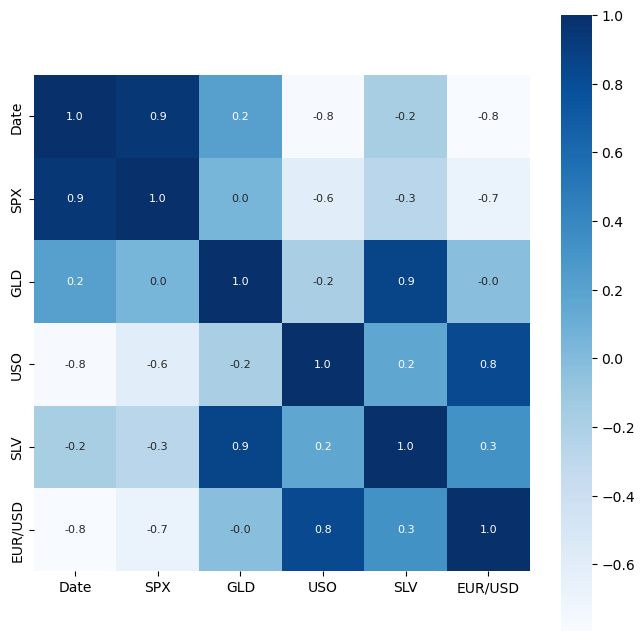

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(corel,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


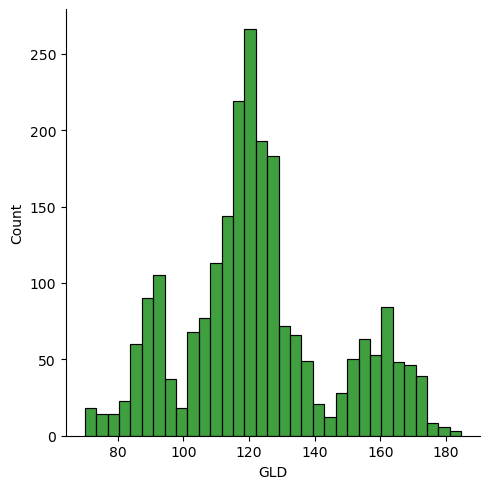

In [27]:
sns.displot(df['GLD'], color='Green')

In [28]:
x=df.drop(['Date','GLD'], axis=1)

In [29]:
y=df['GLD']

In [30]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [32]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=.2)

In [35]:
model=RandomForestRegressor(n_estimators=100)

In [36]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
test_data_prediction=model.predict(x_test)

In [47]:
test_data_prediction

array([168.19389957,  82.09099965, 115.95790015, 127.61510081,
       120.66780149, 154.65929793, 150.61169823, 126.16660013,
       117.46949892, 125.95250115, 116.83320106, 171.61070096,
       141.25759787, 167.74709894, 115.30819976, 117.60490062,
       136.14580321, 170.10419994, 159.51790278, 155.16869951,
       155.04019996, 125.18300054, 175.86899976, 157.70270281,
       125.24630038,  93.73449975,  77.7607997 , 120.4067    ,
       119.05779966, 167.47309908,  88.04380076, 125.12269999,
        91.37570077, 117.63880052, 121.14689907, 136.49320091,
       115.5865014 , 115.06310069, 147.97120023, 107.22980114,
       104.26960243,  87.17029795, 126.45610042, 117.95280008,
       152.97159927, 119.66860018, 108.4005998 , 107.9485983 ,
        93.1226002 , 127.10389786,  75.17580006, 113.64669934,
       121.46899989, 111.34799933, 118.95629902, 120.64379948,
       158.89200063, 168.85800093, 146.84809657,  85.91569902,
        94.44580018,  86.81649907,  90.46970009, 118.93

In [42]:
error_score=metrics.r2_score(y_test,test_data_prediction)

In [43]:
error_score

0.9883888282648488

In [44]:
y_test=list(y_test)

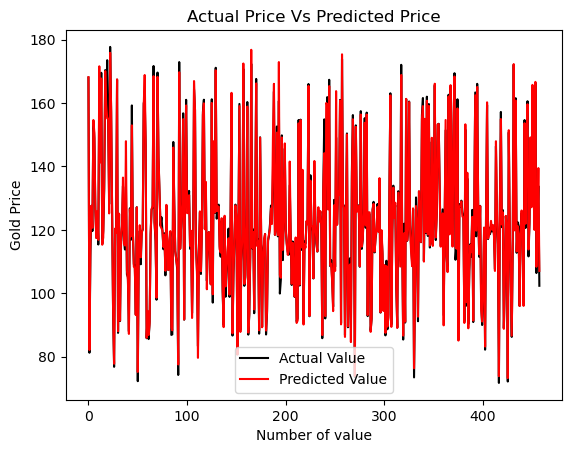

In [46]:
plt.plot(y_test,color='black', label='Actual Value')
plt.plot(test_data_prediction,color='red', label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of value')
plt.ylabel('Gold Price')
plt.legend()
plt.show()